In [2]:
library(fpp2)
library(forecast)

Warning message:
“package ‘fpp2’ was built under R version 3.3.2”Loading required package: forecast
Warning message:
“package ‘forecast’ was built under R version 3.3.2”Loading required package: fma
Loading required package: tseries
Warning message:
“package ‘tseries’ was built under R version 3.3.2”Loading required package: expsmooth
Loading required package: ggplot2


In [ ]:
# mydata <- read_excel("exercise1.xlsx")

# Create a ts object called myts
myts <- ts(mydata[, 2:4], start = c(1981,1), frequency = 4)

forecast::autoplot(dat,

#which.max will find outlier

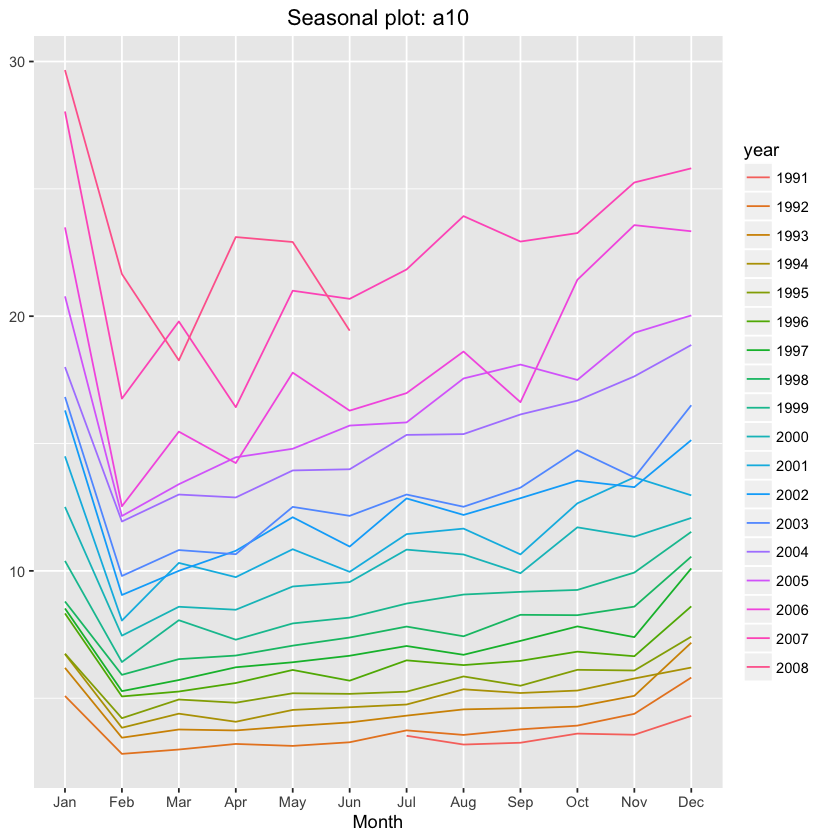

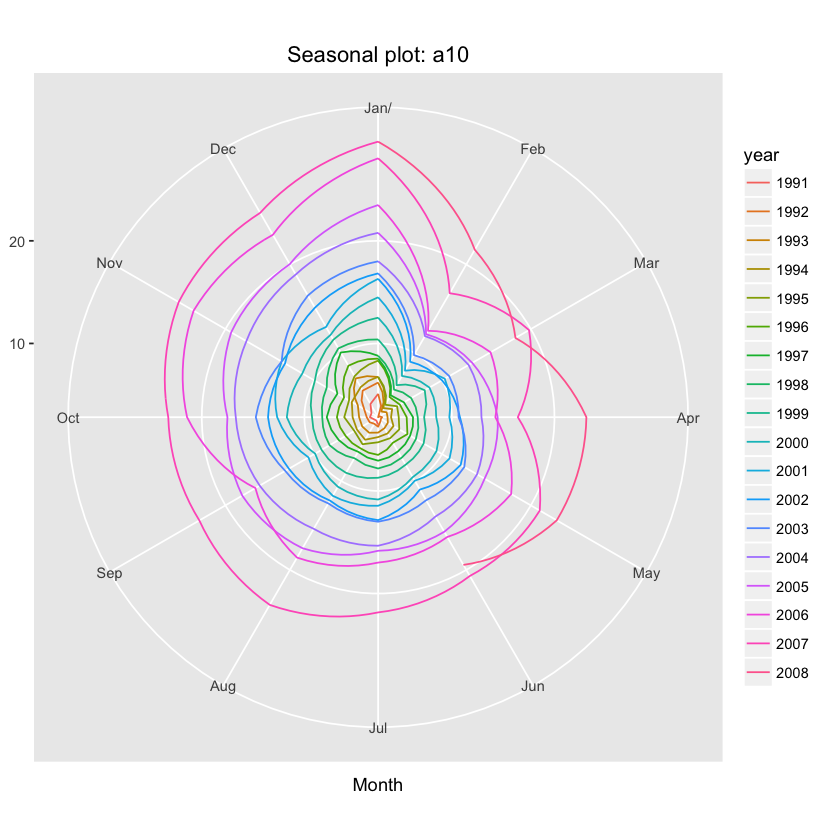

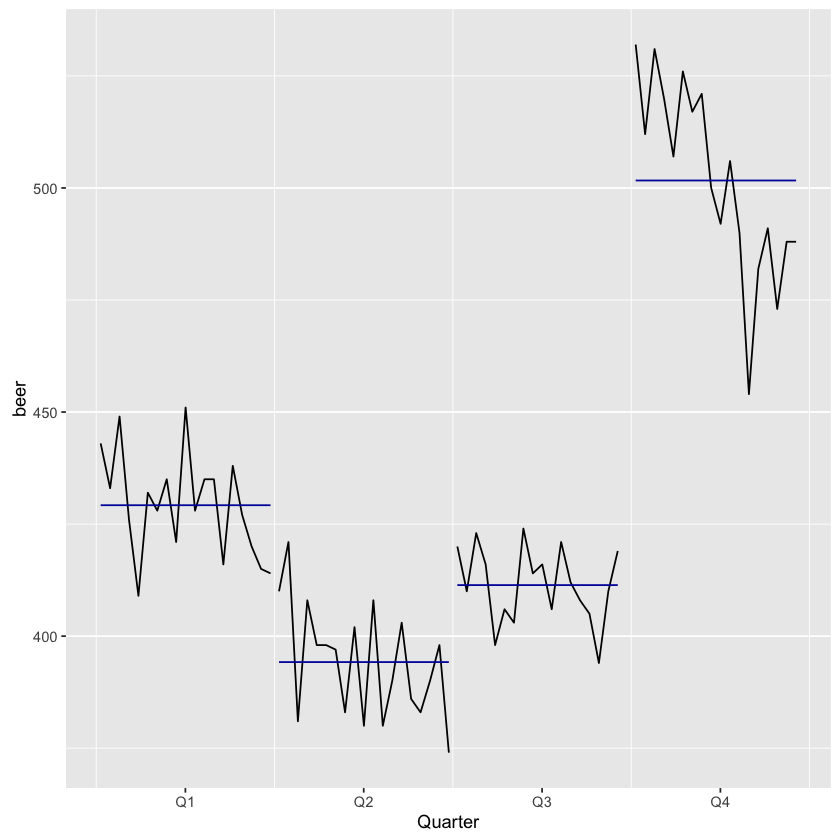

In [25]:
# Create plots of the a10 data
# - autoplot(a10)
ggseasonplot(a10)

# Produce a polar coordinate season plot for the a10 data
ggseasonplot(a10, polar = TRUE)

# Restrict the ausbeer data to start in 1992
beer <- window(ausbeer, start=1992)

# Make plots of the beer data
# - autoplot(beer)
ggsubseriesplot(beer)

##### Trend:
    A pattern exists involving a long-term increase OR decrease in the data
##### Seasonal:
    A periodic pattern exists due to the calendar(eg. quarter, month, day_of_week)
##### Cyclic:
    A pattern exists where hte data exchibits rises and falls taht are not of fixed period
    (duration usually of at least 2 years. I.E. business cycle at 3 or 5 years)
    Cyclic patterns have variable length 
    Magnitude of cycle tends to be higher than seasonal

In [ ]:
## Seasonal or cyclic?

# Use naive() to forecast the goog series
fcgoog <- naive(goog, h = 20)

# Plot and summarize the forecasts
autoplot(fcgoog)
summary(fcgoog)

# Use snaive() to forecast the ausbeer series
fcbeer <- snaive(ausbeer, h = 16)

# Plot and summarize the forecasts
autoplot(fcbeer)
summary(fcbeer)    

# ------- fitted values vs residuals ----------------------
# Check the residuals from the naive forecasts applied to the goog series
goog %>% naive() %>% checkresiduals()

# Do they look like white noise (TRUE or FALSE)
googwn <- TRUE

# Check the residuals from the seasonal naive forecasts applied to the ausbeer series
ausbeer %>% snaive() %>% checkresiduals()

# Do they look like white noise (TRUE or FALSE)
beerwn <- FALSE

### MAE & MSE - depends on the scale of the data

# Create the training data as train
train <- subset.ts(gold, end = 1000)

# Compute naive forecasts and save to naive_fc
naive_fc <- naive(train, h = 108)

# Compute mean forecasts and save to mean_fc
mean_fc <- meanf(train, h = 108)

# Use accuracy() to compute RMSE statistics
accuracy(naive_fc, gold)
accuracy(mean_fc, gold)

# Assign one of the two forecasts as bestforecasts
bestforecasts <- naive_fc


###  Exponential Smoothing (Section 3) 
* Clever way to say it is its in between the naive forecast and the mean. 
* Commonly known as the simple exponential forecast
    * smoothing equation


In [3]:
library(fpp2)

Warning message:
“package ‘fpp2’ was built under R version 3.3.2”Loading required package: forecast
Warning message:
“package ‘forecast’ was built under R version 3.3.2”Loading required package: fma
Loading required package: tseries
Warning message:
“package ‘tseries’ was built under R version 3.3.2”Loading required package: expsmooth
Loading required package: ggplot2


In [8]:
fc <- ses(marathon, h = 5)

In [9]:
summary(fc)


Forecast method: Simple exponential smoothing

Model Information:
Simple exponential smoothing 

Call:
 ses(y = marathon, h = 5) 

  Smoothing parameters:
    alpha = 0.3457 

  Initial states:
    l = 167.1765 

  sigma:  5.4728

     AIC     AICc      BIC 
988.4474 988.6543 996.8099 

Error measures:
                     ME     RMSE      MAE        MPE     MAPE      MASE
Training set -0.8875951 5.472771 3.826287 -0.7098466 2.637645 0.8925669
                    ACF1
Training set -0.01207536

Forecasts:
     Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
2017       130.3562 123.3425 137.3698 119.6297 141.0826
2018       130.3562 122.9353 137.7771 119.0069 141.7054
2019       130.3562 122.5492 138.1631 118.4165 142.2958
2020       130.3562 122.1814 138.5309 117.8539 142.8584
2021       130.3562 121.8294 138.8829 117.3156 143.3967


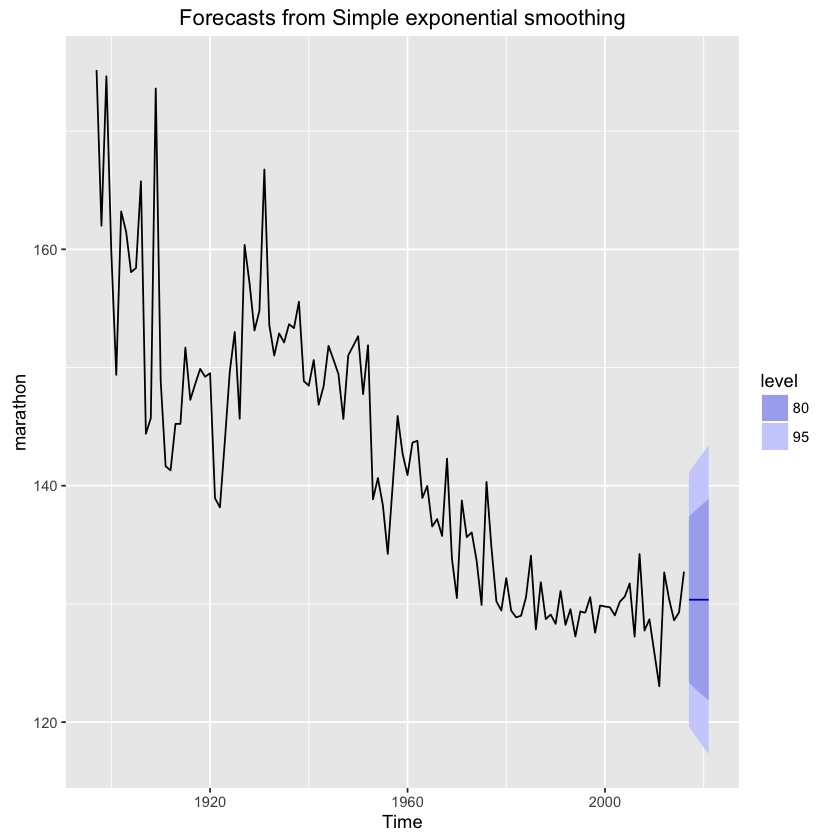

In [10]:
# Use autoplot() to plot the forecasts
autoplot(fc)

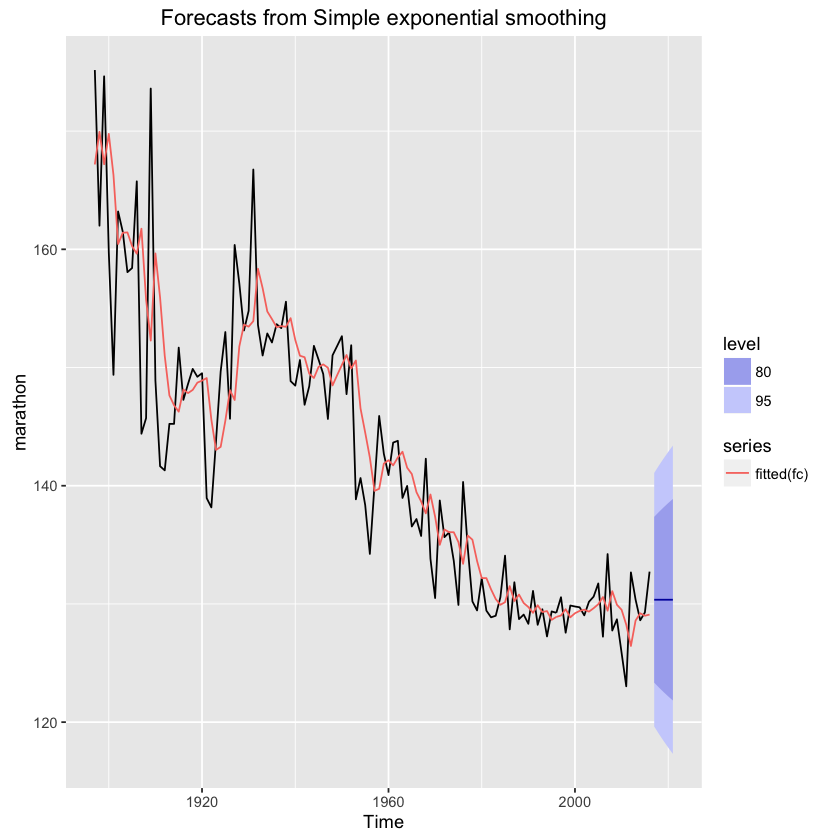

In [11]:
# Add the one-step forecasts for the training data to the plot
autoplot(fc) + autolayer(fitted(fc))

In [18]:
library(forecast)

In [21]:
# Create a training set using subset.ts()
train <- forecast:::subset.ts(marathon, end = length(marathon) - 20)

# Compute SES and naive forecasts, save to fcses and fcnaive
fcses <- ses(train, h = 20)
fcnaive <- naive(train, h = 20)

# Calculate forecast accuracy measures
accuracy(fcses, marathon)
accuracy(fcnaive, marathon)

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,-1.085512,5.863790,4.155943,-0.8606360,2.827999,0.8990895,-0.01587645,NA
Test set,0.457428,2.493965,1.894228,0.3171688,1.463856,0.4097941,-0.12556096,0.6870722


,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,-0.4638047,6.904742,4.622391,-0.4086317,3.123559,1.0000000,-0.3589323,NA
Test set,0.2266667,2.462113,1.846667,0.1388780,1.429608,0.3995047,-0.1255610,0.6799062


#### Exponential smoothing with trend


Forecast method: Holt's method

Model Information:
Holt's method 

Call:
 holt(y = austa, h = 10) 

  Smoothing parameters:
    alpha = 0.9999 
    beta  = 1e-04 

  Initial states:
    l = 0.5684 
    b = 0.1755 

  sigma:  0.1839

     AIC     AICc      BIC 
17.08684 19.08684 25.00443 

Error measures:
                        ME      RMSE       MAE       MPE     MAPE      MASE
Training set -0.0006980015 0.1839059 0.1628927 -1.231661 6.322328 0.7994647
                 ACF1
Training set 0.234277

Forecasts:
     Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
2016       7.034379 6.798694 7.270064 6.673930 7.394828
2017       7.209838 6.876529 7.543147 6.700086 7.719590
2018       7.385297 6.977065 7.793529 6.760960 8.009633
2019       7.560756 7.089350 8.032161 6.839804 8.281707
2020       7.736214 7.209144 8.263285 6.930129 8.542299
2021       7.911673 7.334269 8.489077 7.028610 8.794736
2022       8.087132 7.463435 8.710829 7.133269 9.040994
2023       8.262591 7.595798 8.929383

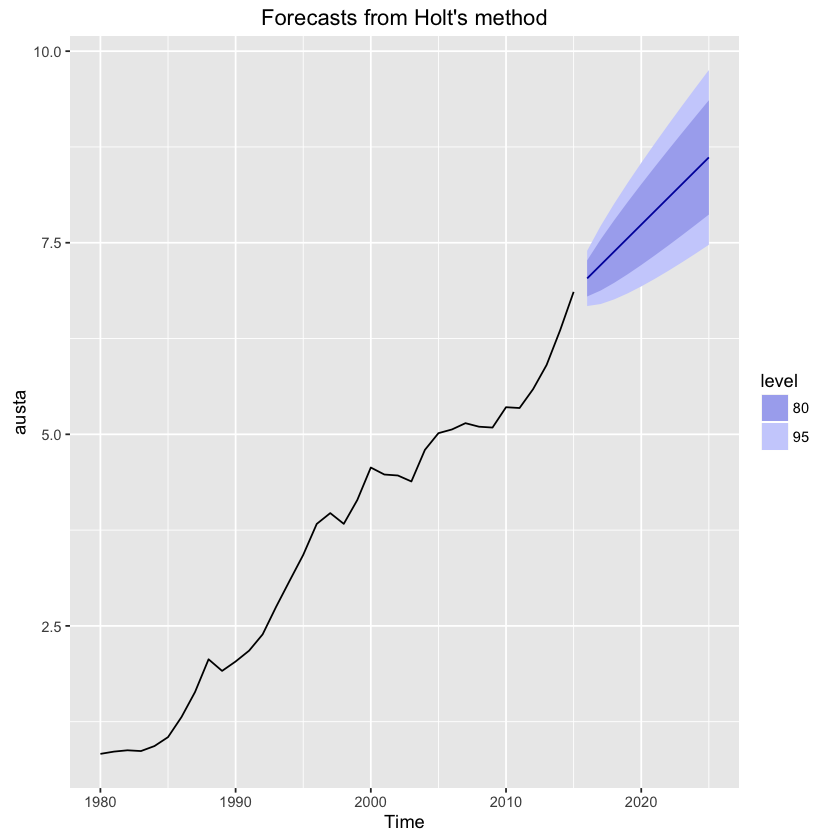


	Ljung-Box test

data:  Residuals from Holt's method
Q* = 5.4561, df = 6, p-value = 0.4868

Model df: 4.   Total lags used: 10



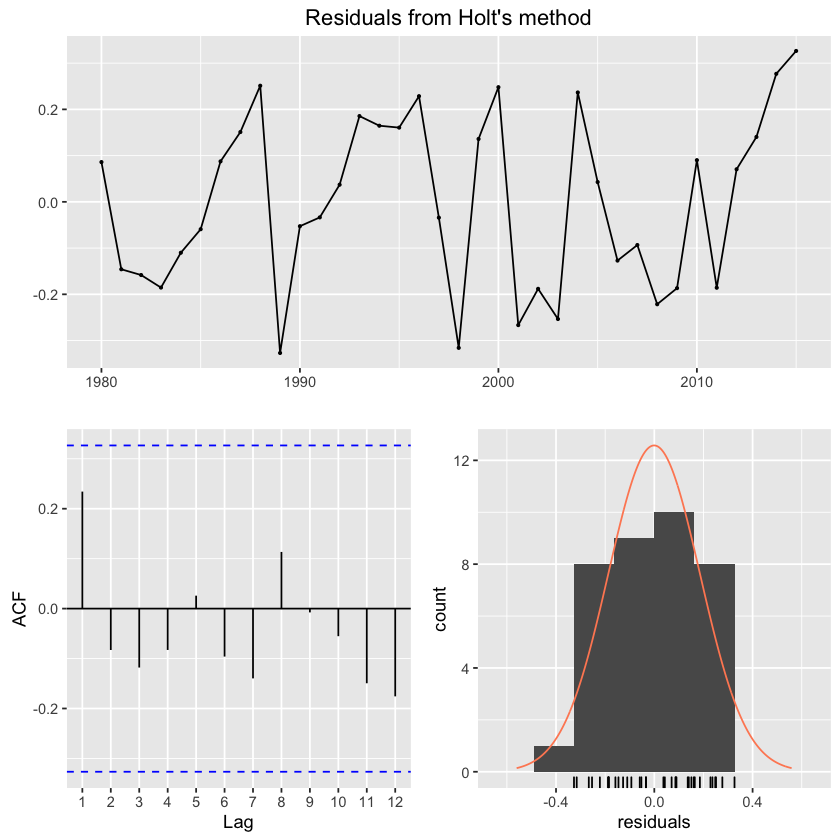

In [22]:
# Produce 10 year forecasts of austa using holt()
fcholt <- holt(austa, h = 10)

# Look at fitted model using summary()
summary(fcholt)

# Plot the forecasts
autoplot(fcholt)

# Check that the residuals look like white noise
checkresiduals(fcholt)

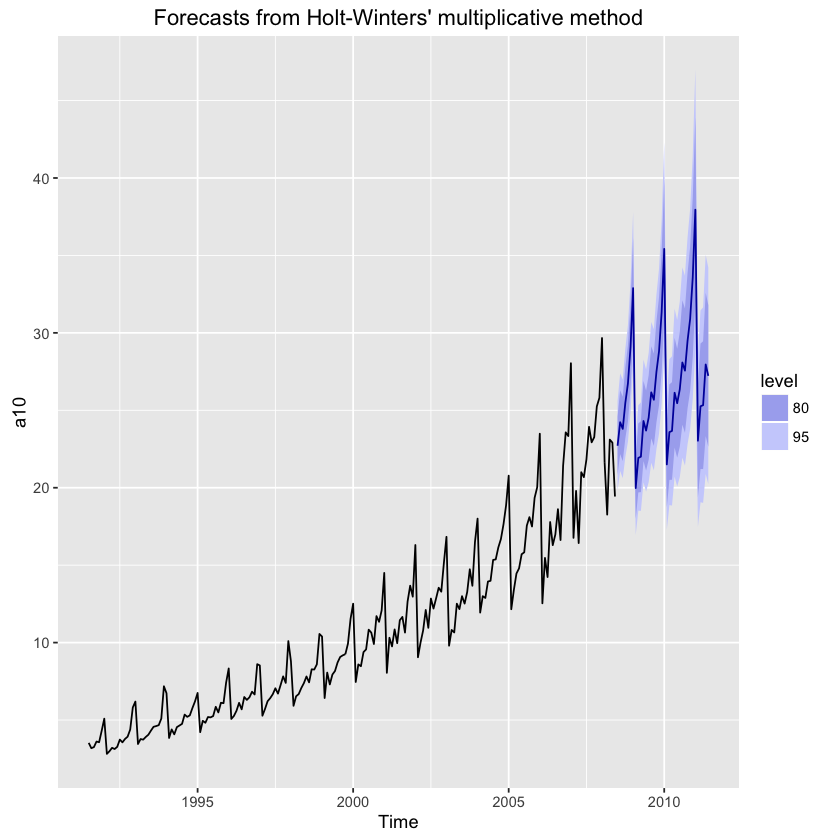

In [3]:
# Produce 3 year forecasts
fc <- hw(a10, seasonal = 'multiplicative', h = 36)

# Check if residuals look like white noise
# checkresiduals(fc)

# Plot forecasts
autoplot(fc)

#### Exponential - state space models
    * ETS - Error, Trend, Seasonal
    * Can calculate prediction interval and parameterize based on out of sample performance
    * AICc - similar to AICc,  faster than TS Cross validation
        * maximizes likelihood rather than minimizing sum of squarred errors
    * Advantage of this method is the model is chosen for you!

In [4]:
# Fit ETS model to austa in fitaus
fitaus <- ets(austa)

# Check residuals 
# checkresiduals(fitaus)

# Plot forecasts
# autoplot(forecast(fitaus))

# Repeat for hyndsight data in fiths
fiths <- ets(hyndsight)
# checkresiduals(fiths)
# autoplot(forecast(fiths))

# Which model(s) fails test? (TRUE or FALSE)
fitausfail <- FALSE
fithsfail <- TRUE

In [ ]:
# Function to return ETS forecasts
fets <- function(y, h) {
  forecast(ets(y), h = h)
}

# Apply tsCV() for both methods. # Time series cross validation
e1 <- tsCV(cement, fets, h = 4)
e2 <- tsCV(cement, snaive, h = 4)

# Compute MSE of resulting errors (watch out for missing values)
mean(e1^2, na.rm = T)
mean(e2^2, na.rm = T)

# Copy the best forecast MSE
bestmse <- 0.02921384

#### ETS does not handle cyclical data particularly well  (down)

ETS(M,N,N) 

Call:
 ets(y = lynx) 

  Smoothing parameters:
    alpha = 0.9999 

  Initial states:
    l = 169.2223 

  sigma:  0.9489

     AIC     AICc      BIC 
2052.369 2052.587 2060.578 

Training set error measures:
                   ME     RMSE      MAE       MPE     MAPE      MASE      ACF1
Training set 28.30726 1182.181 824.4878 -44.94341 94.83425 0.9923325 0.3785704


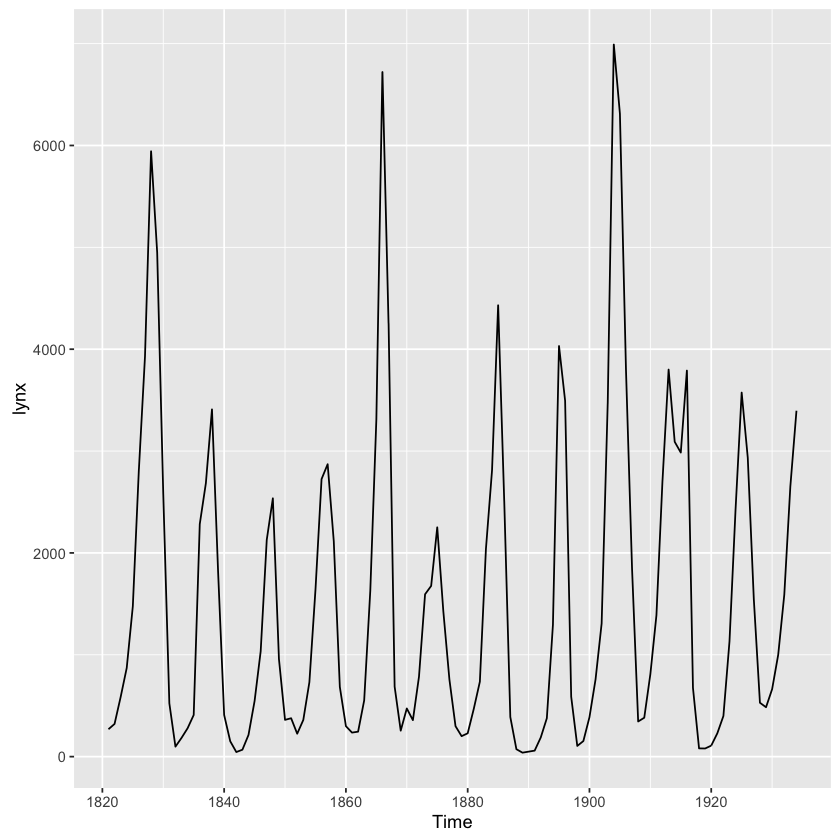

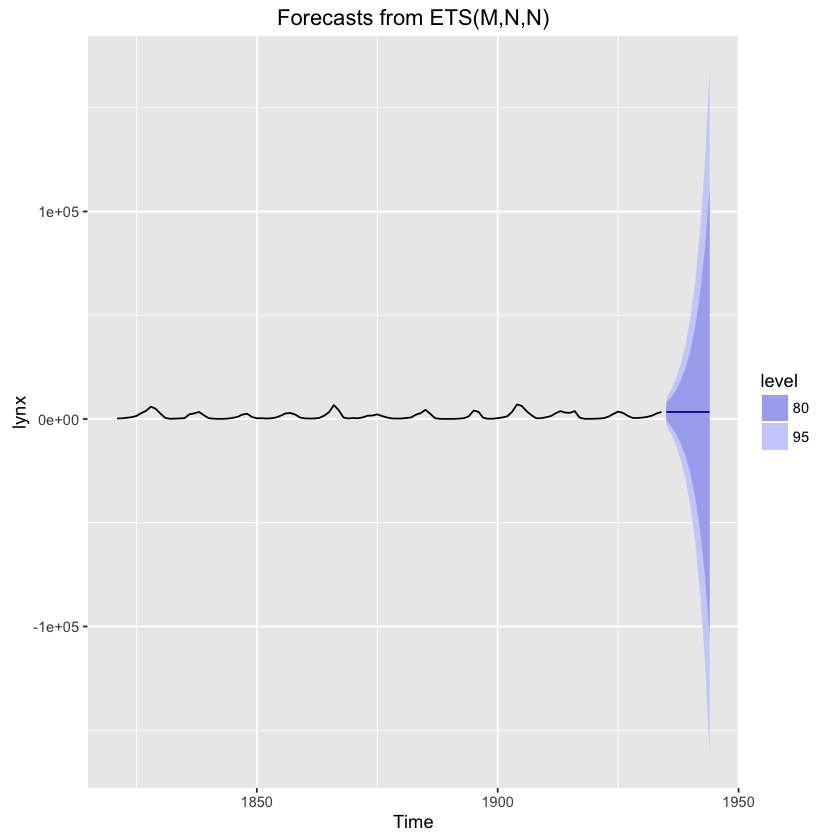

In [6]:
# Plot the lynx series
autoplot(lynx)

# Use ets() to model the lynx series
fit <- ets(lynx)

# Use summary() to look at model and parameters
summary(fit)

# Plot 20-year forecasts of the lynx series
fit %>% forecast %>% autoplot

## ARIMA Models

    # Variance stabilization
    ## [Box Cox Transformtion](http://blog.minitab.com/blog/applying-statistics-in-quality-projects/how-could-you-benefit-from-a-box-cox-transformation)
        * Convert to normal distribution

In [2]:
# Plot the series
# autoplot(a10)

# Try four values of lambda in Box-Cox transformations
# a10 %>% BoxCox(lambda = 0) %>% autoplot()
# a10 %>% BoxCox(lambda = 0.1) %>% autoplot()
# a10 %>% BoxCox(lambda = 0.2) %>% autoplot()
# a10 %>% BoxCox(lambda = 0.3) %>% autoplot()

# Compare with BoxCox.lambda()
BoxCox.lambda(a10)

[1] 0.1313326

#### * Differencing is a way of making a time series stationary; this means that you remove any systematic patterns such as trend and seasonality from the data. A white noise series is considered a special case of a stationary time series.

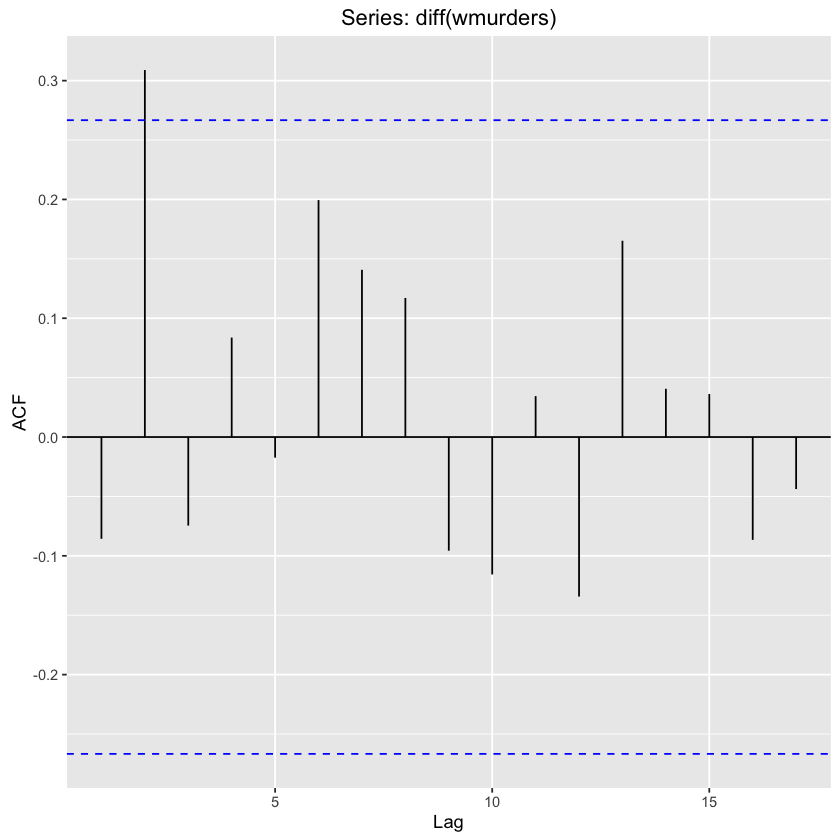

In [3]:
# Plot the US female murder rate
# autoplot(wmurders)

# Plot the differenced murder rate
# autoplot(diff(wmurders))

# Plot the ACF of the differenced murder rate
ggAcf(diff(wmurders))

In [ ]:
# Plot the data
autoplot(h02)

# Take logs and seasonal differences of h02
difflogh02 <- diff(log(h02), lag = 12)

# Plot difflogh02
autoplot(difflogh02)

# Take another difference and plot
ddifflogh02 <- diff(difflogh02, lag = 1)
autoplot(ddifflogh02)

# Plot ACF of ddifflogh02
ggAcf(ddifflogh02)

#### ARIMA AICc vs ETS AICc is not apples to apples
#### How does auto.arima work?
    * Hyndman - khandakah algorithm
    * select number of differenced d via unit root tests
    * select p and q by minimizing AICc
    * Estiamte parametrs using maximum likelihood etimation
    * Use stepwise search to traverse model space, to save time

Series: austa 
ARIMA(0,1,1) with drift 

Coefficients:
         ma1   drift
      0.3006  0.1735
s.e.  0.1647  0.0390

sigma^2 estimated as 0.03376:  log likelihood=10.62
AIC=-15.24   AICc=-14.46   BIC=-10.57

Training set error measures:
                       ME      RMSE       MAE       MPE     MAPE      MASE
Training set 0.0008313383 0.1759116 0.1520309 -1.069983 5.513269 0.7461559
                     ACF1
Training set -0.000571993


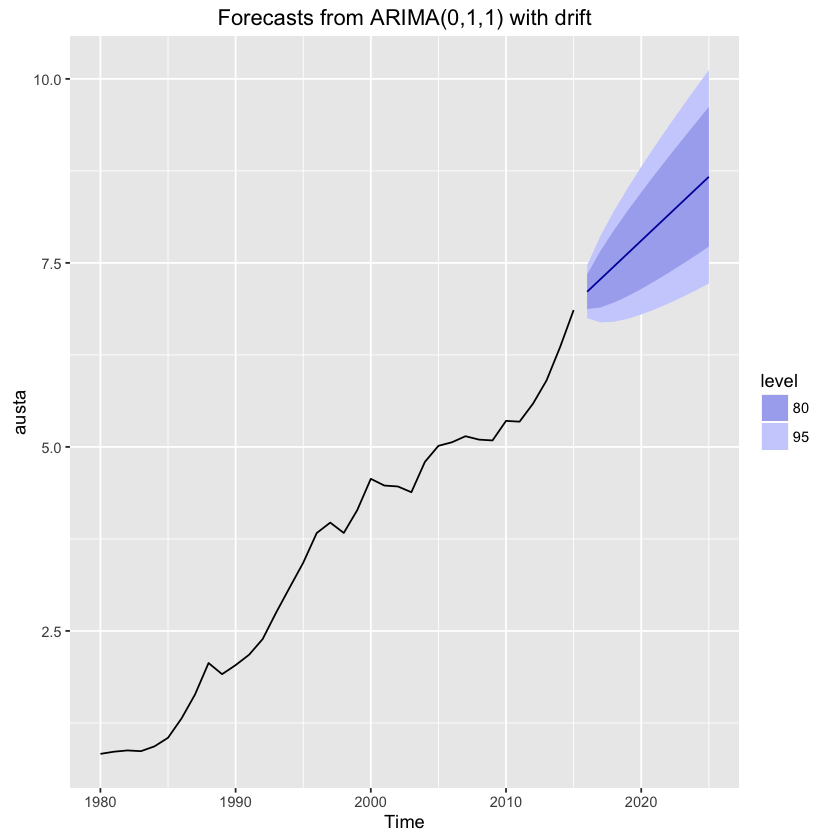

In [5]:
# Fit an automatic ARIMA model to the austa series
fit <- auto.arima(austa)

# Check that the residuals look like white noise
# checkresiduals(fit)

residualsok <- TRUE

# Summarize the model
summary(fit)

# Find the AICc value and the number of differences used
AICc <- -14.46
d <- 1

# Plot forecasts of fit
fit %>% forecast(h = 10) %>% autoplot()

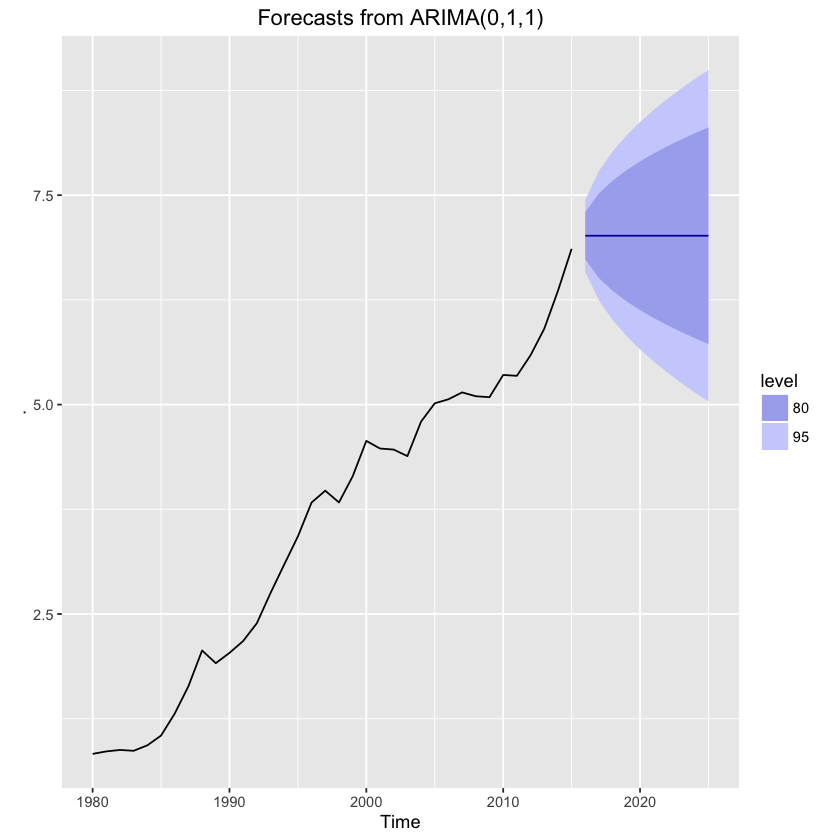

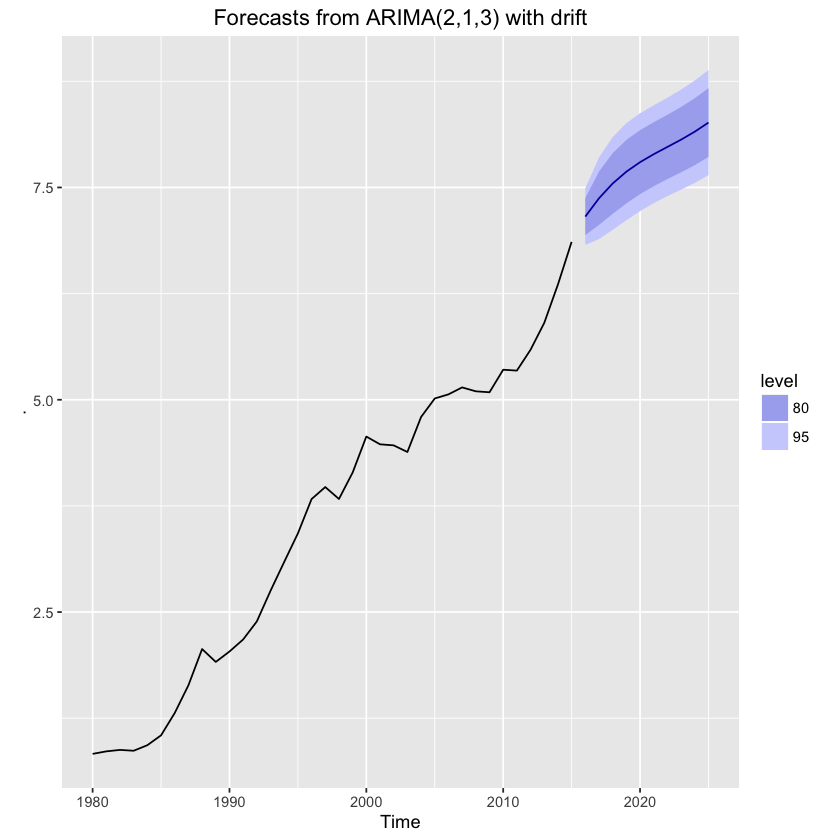

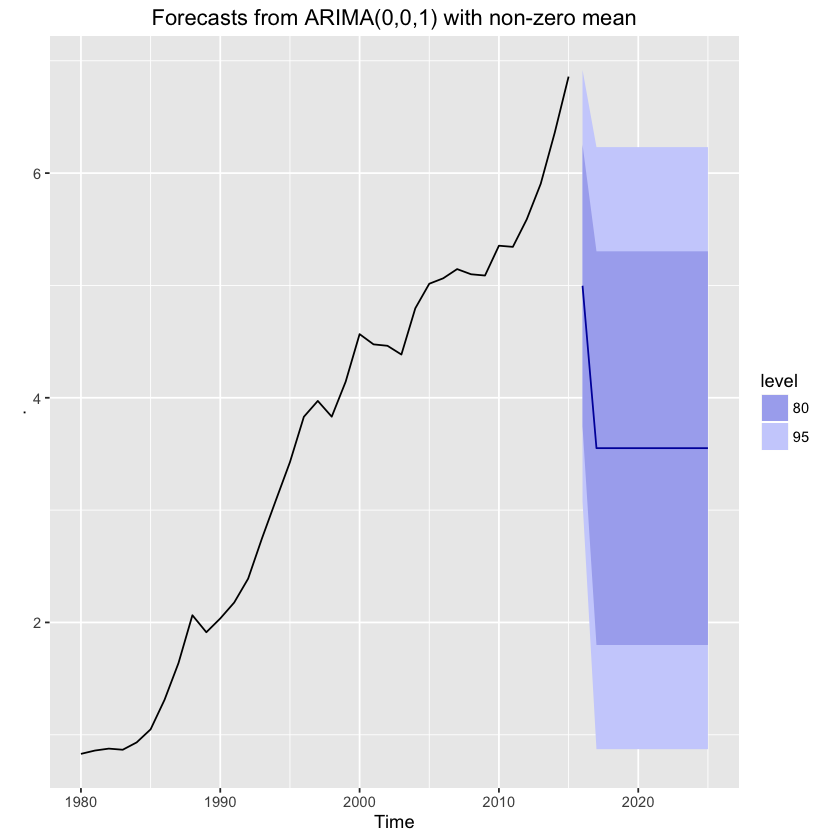

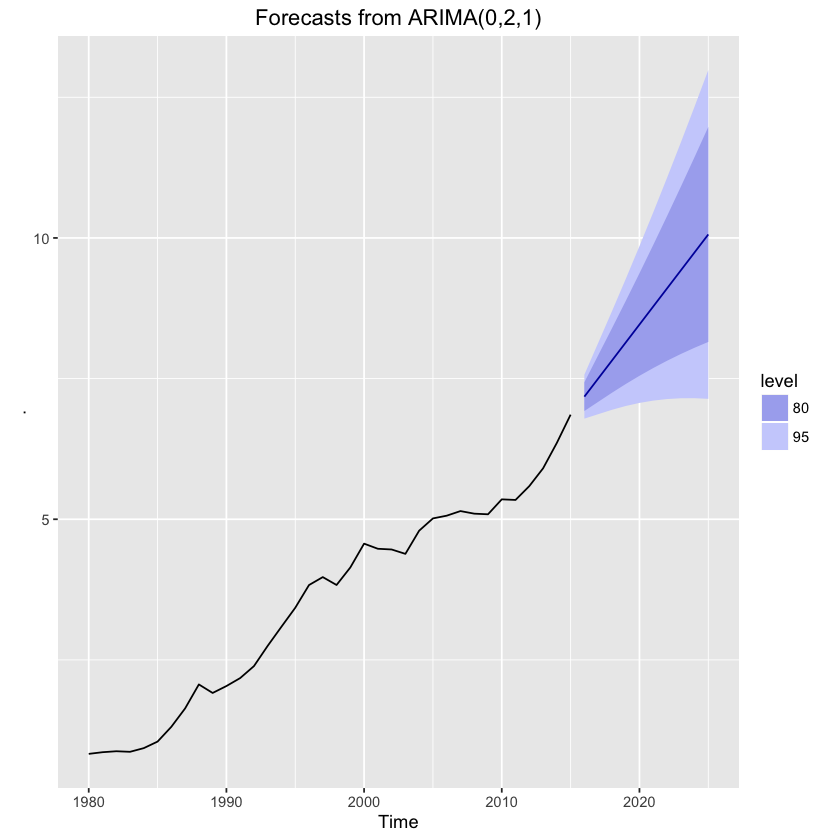

In [2]:
# Plot forecasts from an ARIMA(0,1,1) model with no drift
austa %>% Arima(order = c(0, 1, 1), include.constant = FALSE) %>% forecast() %>% autoplot()

# Plot forecasts from an ARIMA(2,1,3) model with drift
austa %>% Arima(order = c(2, 1, 3), include.constant = TRUE) %>% forecast() %>% autoplot()

# Plot forecasts from an ARIMA(0,0,1) model with a constant
austa %>% Arima(order = c(0, 0, 1), include.constant = TRUE) %>% forecast() %>% autoplot()
# Plot forecasts from an ARIMA(0,2,1) model with no constant
austa %>% Arima(order = c(0, 2, 1), include.constant = FALSE) %>% forecast() %>% autoplot()


#### Compare selected models

In [ ]:
# Set up forecast functions for ETS and ARIMA models
fets <- function(x, h) {
  forecast(ets(x), h = h)
}

farima <- function(x, h) {
  forecast(auto.arima(x), h = h)
}

# Compute CV errors for ETS as e1
e1 <- tsCV(austa, fets, h = 1)

# Compute CV errors for ARIMA as e2
e2 <- tsCV(austa, farima, h = 1)

# Find MSE of each model class
mean(e1^2, na.rm = T)
mean(e2^2, na.rm = T)

# Plot 10-year forecasts using the best model class
austa %>% farima(h=10) %>% autoplot()

### Seasonal ARIMA
    * Arima models can be harder to explain
    * Seasonal component can change over time
    * If you do 2 lots of differencing this will produce a trend

In [ ]:
# Check that the logged h02 data have stable variance
h#02 %>% log() %>% autoplot()

# Fit a seasonal ARIMA model to h02 with lambda = 0
fit <- auto.arima(h02, lambda =0)

# Summarize the fitted model
summary(fit)

# Record the amount of lag-1 differencing and seasonal differencing used
d <- 1
D <- 1

# Plot 2-year forecasts
# fit %>% forecast(h=24) %>% autoplot

In [ ]:
# Don't use a stepwise search. This can take longer to train a model but can potentionally generate better AICc
fit2 <- auto.arima(euretail, stepwise = FALSE )

In [ ]:
# Compare ETS vs auto.arima. Do not need to use tsCV as there is sufficient out of sample data
# Use 20 years of the qcement data beginning in 1988
train <- window(qcement, start = 1988, end = c(2007, 4))

# Fit an ARIMA and an ETS model to the training data
fit1 <- auto.arima(train)
fit2 <- ets(train)

# Check that both models have white noise residuals
checkresiduals(fit1)
checkresiduals(fit2)


# Produce forecasts for each model
fc1 <- forecast(fit1, h = 25)
fc2 <- forecast(fit2, h = 25)

# Use accuracy() to find better model based on RMSE
accuracy(fc1, qcement)
accuracy(fc2, qcement)

bettermodel <- fc2

## Advanced methods

### Dynamic regression
    * Error terms are governed by an ARIMA process itself
    * Helpful for multiseries components

In [5]:
# Time plot of both variables
# autoplot(advert, facets = TRUE)

# Fit ARIMA model
fit <- auto.arima(advert[, 'sales'], xreg = advert[, 'advert'], stationary = TRUE)

# Check model. Increase in sales for each unit increase in advertising
salesincrease <- coefficients(fit)[3]

# Forecast fit as fc
fc <- forecast(fit, xreg = rep(10, 6))

summary(fc)
# Plot fc with x and y labels
# autoplot(fc) + xlab('Month') + ylab('Sales')


Forecast method: Regression with ARIMA(1,0,0) errors

Model Information:
Series: advert[, "sales"] 
Regression with ARIMA(1,0,0) errors 

Coefficients:
         ar1  intercept   xreg
      0.7247    79.2725  0.508
s.e.  0.1339     0.7349  0.022

sigma^2 estimated as 1.116:  log likelihood=-34.15
AIC=76.29   AICc=78.4   BIC=81

Error measures:
                      ME     RMSE       MAE         MPE      MAPE      MASE
Training set -0.03570439 0.988353 0.7612276 -0.06588987 0.8951198 0.1650164
                   ACF1
Training set 0.02381244

Forecasts:
   Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
25       85.14063 83.78655 86.49471 83.06974 87.21151
26       84.92366 83.25139 86.59592 82.36615 87.48117
27       84.76642 82.94923 86.58362 81.98726 87.54558
28       84.65247 82.76361 86.54134 81.76371 87.54124
29       84.56990 82.64447 86.49533 81.62520 87.51459
30       84.51005 82.56569 86.45441 81.53641 87.48370


In [6]:
# Time plots of demand and temperatures
autoplot(elec[, c('Demand', 'Temperature')], facets = TRUE)

# Matrix of regressors
xreg <- cbind(MaxTemp = elec[, "bTemperature"], 
              MaxTempSq = elec[, "Temperature"] ^ 2, 
              Workday = elec[, "Workday"])

# Fit model
fit <- auto.arima(elec[, 'Demand'], xreg = xreg)

# Forecast fit one day ahead
forecast(fit, xreg = cbind(15, 15 ^ 2, 0))

ERROR: Error in `[.default`(elec, , c("Demand", "Temperature")): incorrect number of dimensions


## Dynamic harmonic regression
    * based on french mathematician sines and cosines can approximate any periodict function
    * fouriercompnents to handle seasonal components
    * possible advantages when seasonality is very frequent. 

In [ ]:
# Set up harmonic regressors of order 13
harmonics <- fourier(gasoline, K = 13)

# Fit regression model with ARIMA errors
fit <- auto.arima(gasoline, xreg = harmonics, seasonal = TRUE)

# Forecasts next 3 years
newharmonics <- fourier(gasoline, K = 13, h = 3)
fc <- forecast(gasoline, xreg = newharmonics)

# Plot forecasts fc
autoplot(fc)

## TBATS model
  * Everything is automated , combination of everything
  * automation can make things slow as it needs to test everything

In [ ]:
# Plot the gas data
autoplot(gas)

# Fit a TBATS model to the gas data
fit <- tbats(gas)

# Forecast the series for the next 5 years
fc <- forecast(fit, h = 12 * 5)

# Plot the forecasts
# autoplot(fc)

# Record the Box-Cox parameter and the order of the Fourier terms
lambda <- 0.082
K <- 5